In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#Reading the pre-processed data
import pandas as pd
data=pd.read_csv('/gdrive/My Drive/SMS spam detection/Complete_processed_spam_data.csv')
data.head(10)

,Unnamed: 0,SMS,Result
0,0,go jurong point crazy available bugis n great ...,0
1,1,ok lar joking wif u oni,0
2,2,free entry wkly comp win fa cup final tkts st ...,1
3,3,u dun say early hor u c already say,0
4,4,nah think go usf life around though,0
5,5,freemsg hey darling week word back like fun st...,1
6,6,even brother like speak treat like aid patent,0
7,7,per request melle melle oru minnaminunginte nu...,0
8,8,winner valued network customer selected receiv...,1
9,9,mobile month u r entitled update latest colour...,1


In [ ]:
#dropping unnecessary columns
data.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
data.head(10)

,SMS,Result
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think go usf life around though,0
5,freemsg hey darling week word back like fun st...,1
6,even brother like speak treat like aid patent,0
7,per request melle melle oru minnaminunginte nu...,0
8,winner valued network customer selected receiv...,1
9,mobile month u r entitled update latest colour...,1


In [ ]:
#Train and Test data.
x=data['SMS']
y=data['Result']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
#printing the shapes of train and test dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457,)
(4457,)
(1115,)
(1115,)


In [ ]:
#Converting words to vectors using Bagofwords
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train_bow=cv.fit_transform(x_train.values.astype('U')).toarray()

In [ ]:
print(x_train_bow)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Model Development
#1.Multinomial Naive bayes
from sklearn.naive_bayes import MultinomialNB
mul_nb=MultinomialNB()
mul_nb.fit(x_train_bow,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testing the model using real world user input.
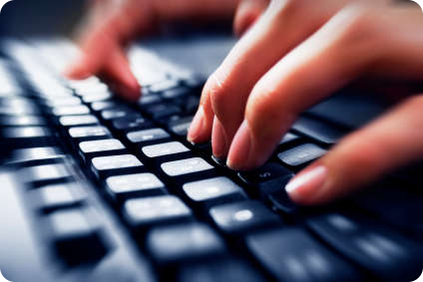

In [ ]:
#Libraries for input message pre-processing
import re
import re
import nltk
nltk.download('punkt')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#user input
while True:
  print("1.Enter any character for user input\t 2.Enter 'B' for exit")
  choice=input("Enter your choice : ")
  if choice=='B':
    break
  else:
    user_ip=input('Enter the message : ') #getting user input
    lemmatizer=WordNetLemmatizer()        #Lemmatization
    processed_ip=[]
    user_msg=re.sub('[^a-zA-Z]',' ',user_ip) #remove punctuation marks
    user_msg=user_msg.lower() #lowering the sentence
    user_msg=user_msg.split() #word tokenization
    user_msg= [lemmatizer.lemmatize(word) for word in user_msg if word not in set(stopwords.words('english'))]
    user_msg=' '.join(user_msg)
    processed_ip.append(user_msg) #storing the processed message in list
    user_ip_bow=cv.transform(processed_ip).toarray() #converting word to vec using BOW
    user_prediction=mul_nb.predict(user_ip_bow) #user input prediction
    if user_prediction==1:
      print("It is a spam message")
    else:
      print("It is a ham message")

1.Enter any character for user input	 2.Enter 'B' for exit
Enter your choice : U
Enter the message : IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
It is a spam message
1.Enter any character for user input	 2.Enter 'B' for exit
Enter your choice : U
Enter the message : A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop
It is a spam message
1.Enter any character for user input	 2.Enter 'B' for exit
Enter your choice : U
Enter the message : You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP
It is a spam message
1.Enter any character for user input	 2.Enter 'B' for exit
Enter your choice : U
Enter the message : Due to a new legislation, those struggling with debt can now apply to have it written 

Modal efficiency:

1. Our model correctly detected the five top spam texts for 2012 revealed in AdaptiveMobile’s Ongoing Threat Analysis as spam message.
2. This proves that our modal is very efficient.

Website link:<br>
https://www.adaptivemobile.com/newsroom/press-release/five-top-spam-texts-for-2012-revealed-in-adaptivemobiles-ongoing-threat-ana